<a href="https://colab.research.google.com/github/sashaarlinskaya/Osnovy_Programming/blob/main/%2206visualizationpandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
 !pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [ ]:
from google.colab import files

# Загрузка файла
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


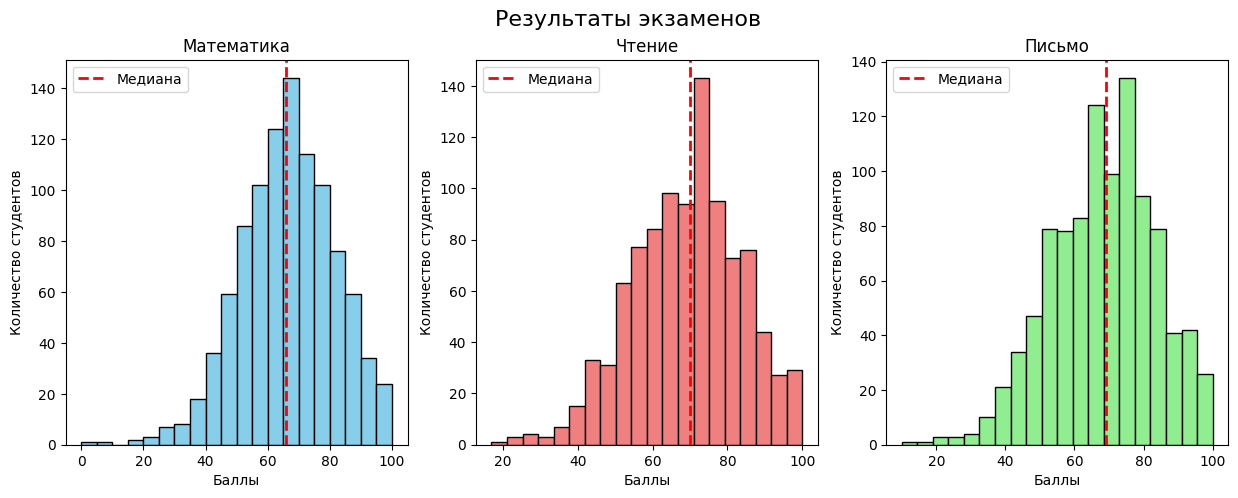

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создание поддатафрейма только с оценками
scores_df = df[['math score', 'reading score', 'writing score']]

# Рассчитываем медианные значения для каждого предмета
medians = scores_df.median()

# Создание графиков
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Результаты экзаменов', fontsize=16)

# График для математики
axs[0].hist(df['math score'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Математика')
axs[0].set_xlabel('Баллы')
axs[0].set_ylabel('Количество студентов')
axs[0].axvline(medians['math score'], color='red', linestyle='dashed', linewidth=2, label='Медиана')

# График для чтения
axs[1].hist(df['reading score'], bins=20, color='lightcoral', edgecolor='black')
axs[1].set_title('Чтение')
axs[1].set_xlabel('Баллы')
axs[1].set_ylabel('Количество студентов')
axs[1].axvline(medians['reading score'], color='red', linestyle='dashed', linewidth=2, label='Медиана')

# График для письма
axs[2].hist(df['writing score'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('Письмо')
axs[2].set_xlabel('Баллы')
axs[2].set_ylabel('Количество студентов')
axs[2].axvline(medians['writing score'], color='red', linestyle='dashed', linewidth=2, label='Медиана')

# Добавление легенды
axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


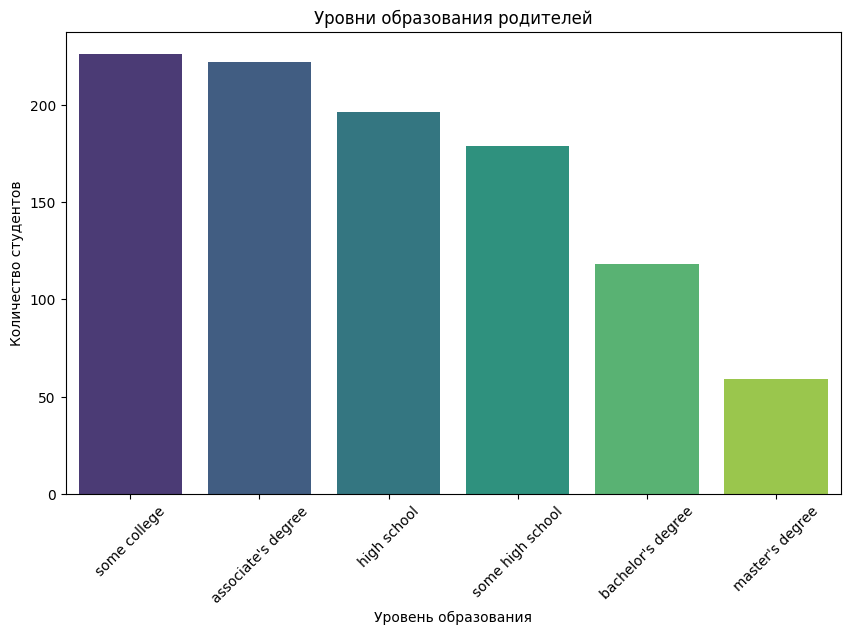

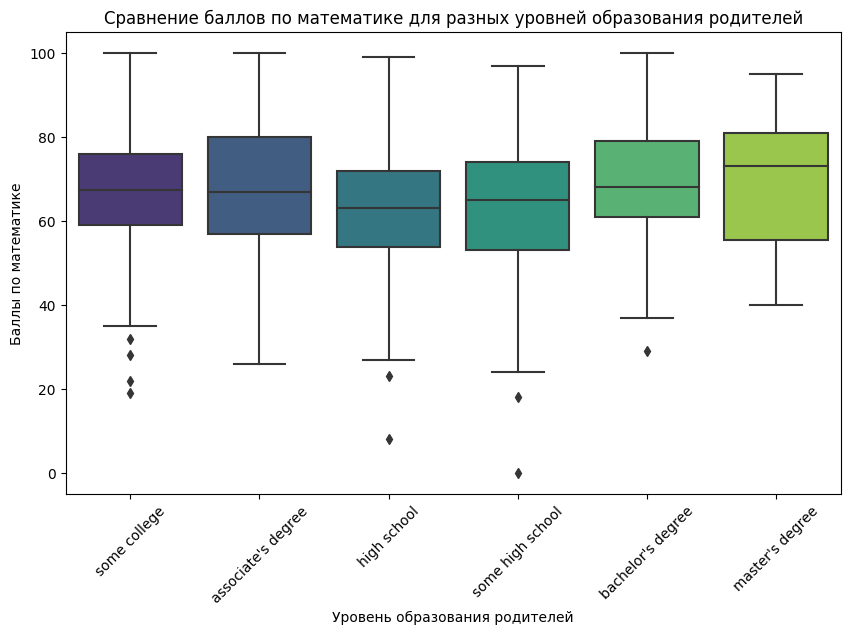

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Определение уровней образования родителей и подсчет количества строк для каждого уровня
education_levels = df['parental level of education'].value_counts()

# Построение графика с распределением уровней образования
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education', order=education_levels.index, palette='viridis')
plt.title('Уровни образования родителей')
plt.xlabel('Уровень образования')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.show()

# Построение графика сравнения баллов по математике для разных уровней образования родителей
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='parental level of education', y='math score', order=education_levels.index, palette='viridis')
plt.title('Сравнение баллов по математике для разных уровней образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.xticks(rotation=45)
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
female_students_above_90 = df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)]

# Выводим количество студенток
num_female_students_above_90 = len(female_students_above_90)
print(f'Количество студенток, набравших больше 90 баллов по всем предметам: {num_female_students_above_90}')

Количество студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
# Группируем по полу и применяем agg() для вычисления минимального, максимального и медианного значения
gender_scores_summary = df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
}).reset_index()

# Выводим результат
print(gender_scores_summary)

   gender math score             reading score             writing score       \
                 min  max median           min  max median           min  max   
0  female          0  100   65.0            17  100   73.0            10  100   
1    male         27  100   69.0            23  100   66.0            15  100   

          
  median  
0   74.0  
1   64.0  


In [ ]:
pip install prettytable

In [ ]:
from prettytable import PrettyTable
# Группируем по полу и применяем agg() для вычисления минимального, максимального и медианного значения
gender_scores_summary = df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
}).reset_index()

# Инициализируем PrettyTable
table = PrettyTable()

# Определяем заголовки
table.field_names = ["Gender", "Math (min, max, median)", "Reading (min, max, median)", "Writing (min, max, median)"]

# Добавляем данные в таблицу
for row in gender_scores_summary.itertuples(index=False):
    table.add_row([row[0], f"{row[1]}, {row[2]}, {row[3]}", f"{row[4]}, {row[5]}, {row[6]}", f"{row[7]}, {row[8]}, {row[9]}"])

# Выводим результат
print(table)

+--------+-------------------------+----------------------------+----------------------------+
| Gender | Math (min, max, median) | Reading (min, max, median) | Writing (min, max, median) |
+--------+-------------------------+----------------------------+----------------------------+
| female |       0, 100, 65.0      |       17, 100, 73.0        |       10, 100, 74.0        |
|  male  |      27, 100, 69.0      |       23, 100, 66.0        |       15, 100, 64.0        |
+--------+-------------------------+----------------------------+----------------------------+


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [ ]:
# Группируем по полу, обеду и подготовке к тесту
gender_lunch_prep_scores = df.groupby(['gender', 'lunch', 'test preparation course']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

# Округляем средние баллы до двух знаков после запятой
gender_lunch_prep_scores[['math score', 'reading score', 'writing score']] = gender_lunch_prep_scores[['math score', 'reading score', 'writing score']].round(2)

# Определяем заголовки
headers = ['Gender', 'Lunch', 'Test Preparation', 'Mean Math Score', 'Mean Reading Score', 'Mean Writing Score']

# Выводим результат
result_table = PrettyTable(headers)
for row in gender_lunch_prep_scores.itertuples(index=False):
    result_table.add_row(row)

print(result_table)

+--------+--------------+------------------+-----------------+--------------------+--------------------+
| Gender |    Lunch     | Test Preparation | Mean Math Score | Mean Reading Score | Mean Writing Score |
+--------+--------------+------------------+-----------------+--------------------+--------------------+
| female | free/reduced |    completed     |      60.79      |       73.43        |       74.37        |
| female | free/reduced |       none       |      52.89      |       63.83        |       61.78        |
| female |   standard   |    completed     |      71.13      |        79.8        |       81.51        |
| female |   standard   |       none       |      66.53      |       73.39        |       72.97        |
|  male  | free/reduced |    completed     |      65.64      |       65.79        |       65.74        |
|  male  | free/reduced |       none       |      60.61      |       59.08        |       55.29        |
|  male  |   standard   |    completed     |      75.96

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

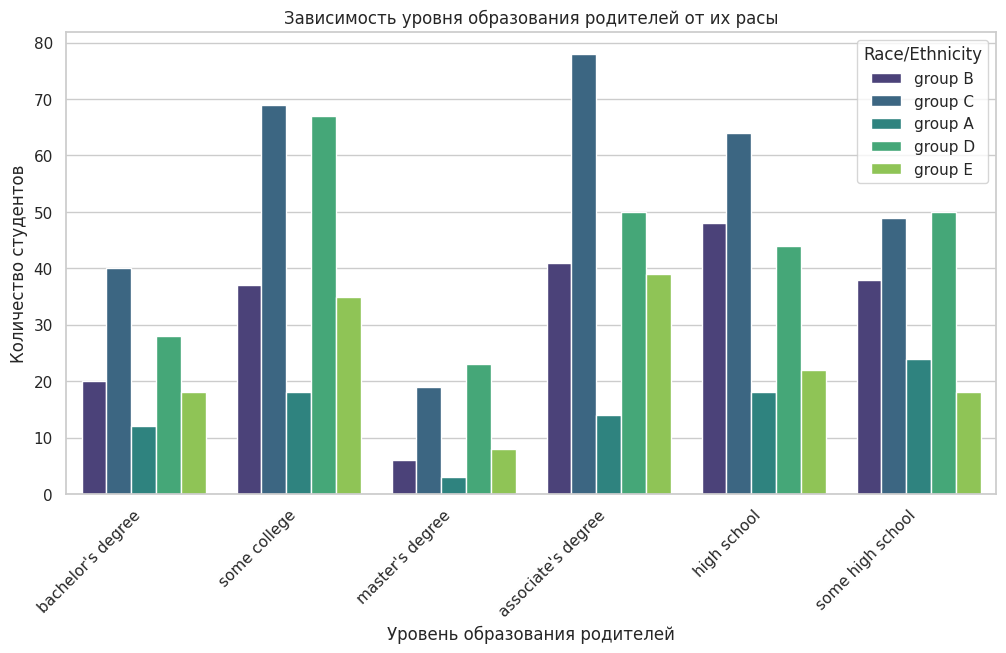

In [ ]:
# Устанавливаем стиль seaborn для более красивого вида графиков
sns.set(style="whitegrid")

# Строим график
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity', palette='viridis')

# Настраиваем отображение
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race/Ethnicity')

# Показываем график
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

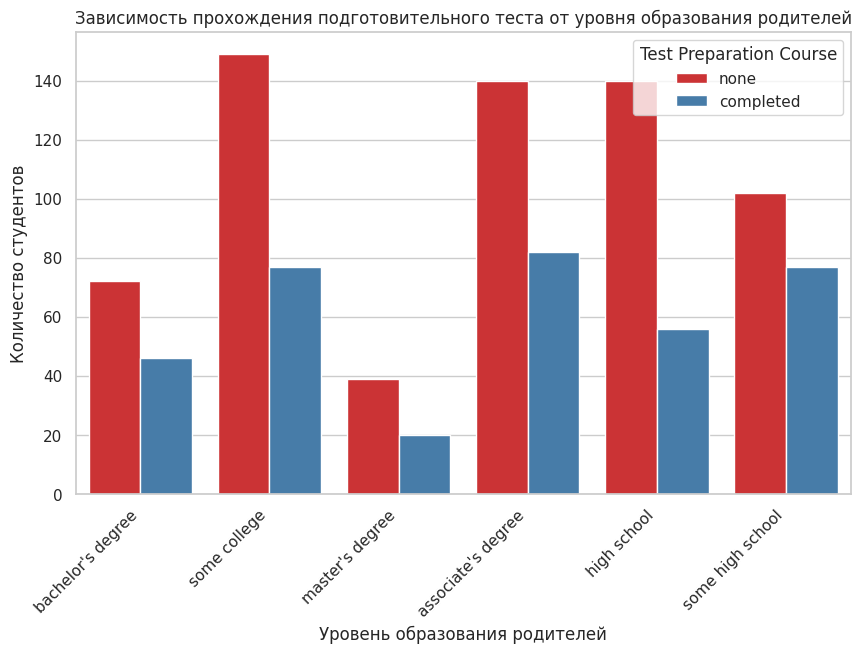

In [ ]:
# Устанавливаем стиль seaborn для более красивого вида графиков
sns.set(style="whitegrid")

# Строим график
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education', hue='test preparation course', palette='Set1')

# Настраиваем отображение
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test Preparation Course', loc='upper right')

# Показываем график
plt.show()

In [ ]:
# Ответ на вопрос
course_counts = df.groupby(['parental level of education', 'test preparation course']).size().unstack()
print(course_counts)

test preparation course      completed  none
parental level of education                 
associate's degree                  82   140
bachelor's degree                   46    72
high school                         56   140
master's degree                     20    39
some college                        77   149
some high school                    77   102


Курс больше проходят те дети, чьи родители закончили только старшую школу

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

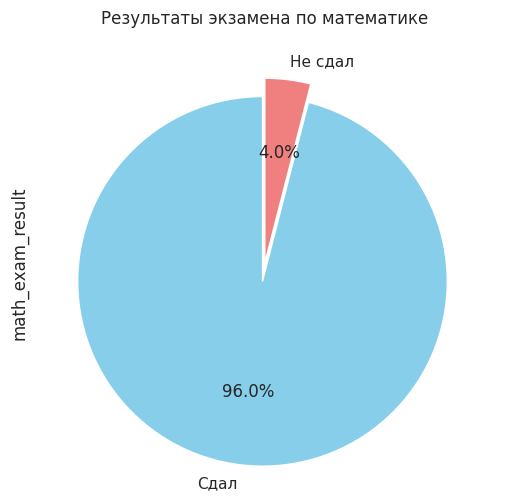

In [ ]:
# Создаем столбец с результатами сдачи экзамена по математике
df['math_exam_result'] = df['math score'] >= 40

# Подсчитываем количество сдавших и не сдавших
result_counts = df['math_exam_result'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(6, 6))
result_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=(0.1, 0), labels=['Сдал', 'Не сдал'], startangle=90)
plt.title('Результаты экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

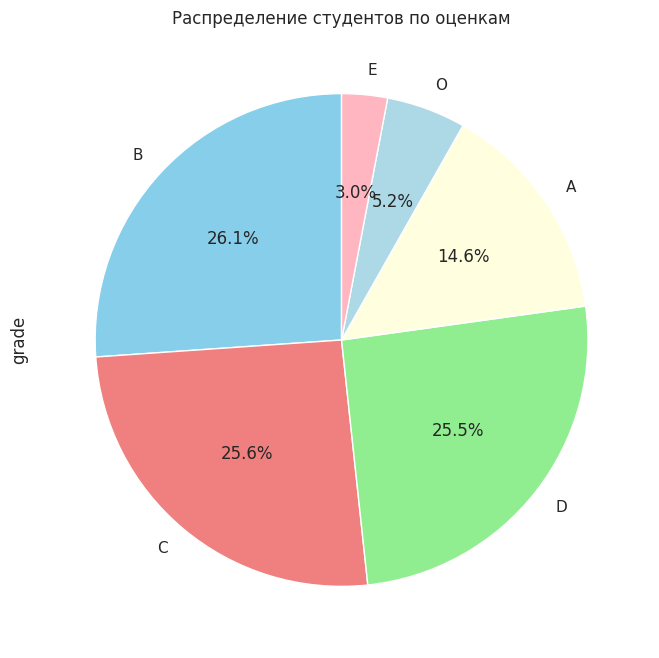

In [ ]:
import numpy as np
# Создаем столбец с суммой результатов за 3 экзамена и средним баллом
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Определяем условия для выставления оценок
conditions = [
    (df['average_score'] < 40),          # E
    (df['average_score'] >= 40) & (df['average_score'] < 60),  # D
    (df['average_score'] >= 60) & (df['average_score'] < 70),  # C
    (df['average_score'] >= 70) & (df['average_score'] < 80),  # B
    (df['average_score'] >= 80) & (df['average_score'] < 90),  # A
    (df['average_score'] >= 90)           # O
]

# Определяем значения для каждого условия
grades = ['E', 'D', 'C', 'B', 'A', 'O']

# Создаем новый столбец с оценками
df['grade'] = np.select(conditions, grades)

# Подсчитываем количество студентов для каждой оценки
grade_counts = df['grade'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(8, 8))
grade_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'lightpink'])
plt.title('Распределение студентов по оценкам')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

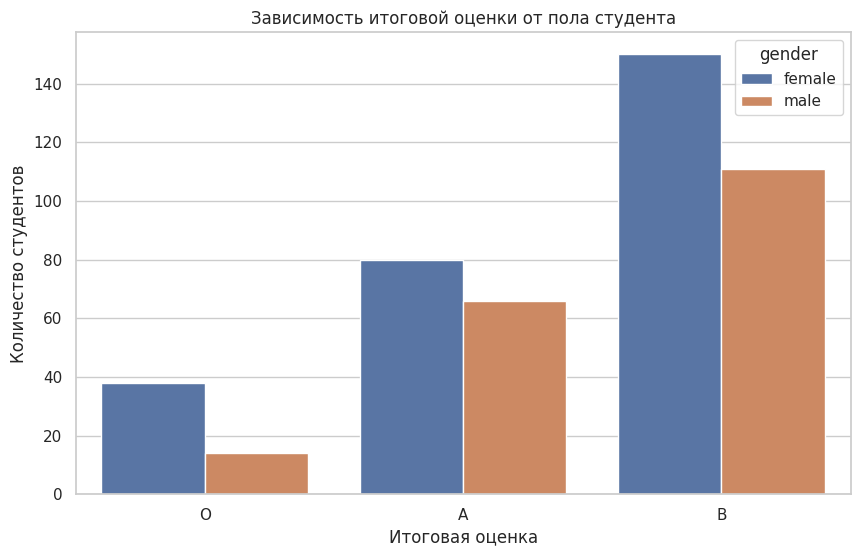

In [ ]:
# Создаем столбец с суммой результатов за 3 экзамена и средним баллом
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Определяем условия для выставления оценок
conditions = [
    (df['average_score'] < 40),          # E
    (df['average_score'] >= 40) & (df['average_score'] < 60),  # D
    (df['average_score'] >= 60) & (df['average_score'] < 70),  # C
    (df['average_score'] >= 70) & (df['average_score'] < 80),  # B
    (df['average_score'] >= 80) & (df['average_score'] < 90),  # A
    (df['average_score'] >= 90)           # O
]

# Определяем значения для каждого условия
grades = ['E', 'D', 'C', 'B', 'A', 'O']

# Создаем новый столбец с оценками
df['grade'] = np.select(conditions, grades)

# Строим countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='gender', order=['O', 'A', 'B'])
plt.title('Зависимость итоговой оценки от пола студента')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')
plt.show()